Populating the interactive namespace from numpy and matplotlib


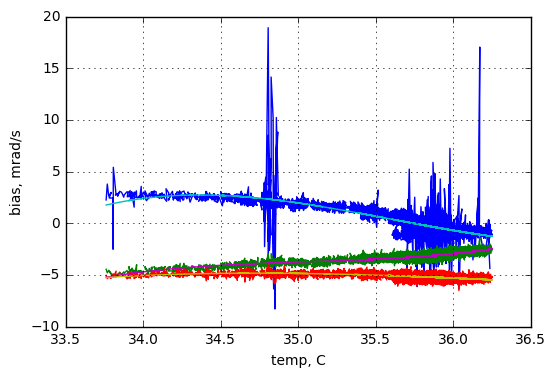

In [1]:
import px4tools
%pylab inline


d = px4tools.ulog.cached_log_processing(
    log='./logs/01-03-17-mhkabir-pixhawk2.ulg',
    msg_filter='sensor_gyro',
    processing_func=lambda x: x['sensor_gyro_0'].resample('1 s').agg('mean'),
    save_label='-gyro-0',
    force_processing=False)

temp = d.t_sensor_gyro_0__f_temperature.ffill()
gx = d.t_sensor_gyro_0__f_x.ffill()
gy = d.t_sensor_gyro_0__f_y.ffill()
gz = d.t_sensor_gyro_0__f_z.ffill()
Y = np.vstack([gx, gy, gz])
c = np.ones(Y.shape[1])
X = np.vstack([temp**3, temp**2, temp, c])
# Y = Theta*X -> Theta = YX^+
Theta = Y.dot(np.linalg.pinv(X))
Theta

plt.plot(temp, 1e3*gx)
plt.plot(temp, 1e3*gy)
plt.plot(temp, 1e3*gz)
plt.plot(temp, 1e3*Theta[0,:].dot(X))
plt.plot(temp, 1e3*Theta[1,:].dot(X))
plt.plot(temp, 1e3*Theta[2,:].dot(X))
plt.xlabel('temp, C')
plt.ylabel('bias, mrad/s')
plt.grid()